# TNK126 - CBA Exercise 2 (congestion tax)

Socio-economically optimal congestion charge, i.e., static/non-dynamic congestion function, limited externalities.

In [707]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar # type: ignore

## (Inverse) demand function

### Definition (example)

In [708]:
# Plot congestion function for different parameter values
D_min = 100
D_max = 1000
# epsilon 10^-6 is added to avoid division by zero	
D_values = np.linspace(D_min, D_max, 50)
selected_slop = 0.05
selected_GK0 = 130

# Demand function (example: linear demand)
def inverse_demand_function(D_values):
    GK_vals = selected_GK0 - selected_slop * D_values
    return GK_vals

# inverse demand function
def demand_function(GK_values):
    D_vals = (selected_GK0 - GK_values) / selected_slop
    return D_vals

## Plots

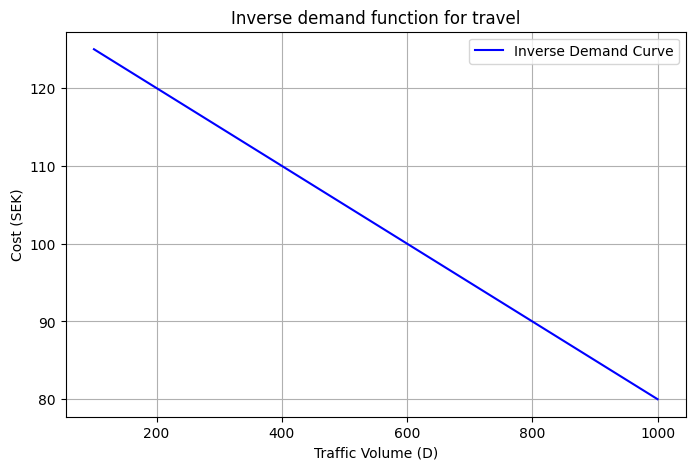

In [709]:
# Plot demand function
GK_vals = inverse_demand_function(D_values)
plt.figure(figsize=(8, 5))
plt.plot(D_values, GK_vals, label='Inverse Demand Curve', color='b')
plt.xlabel("Traffic Volume (D)")
plt.ylabel("Cost (SEK)")
plt.title("Inverse demand function for travel")
plt.legend()
plt.grid()
plt.show()

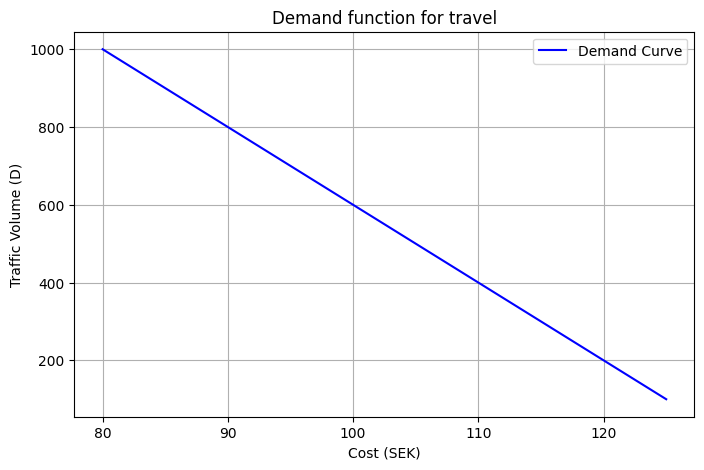

In [710]:
# plot inverse demand function
D_vals = demand_function(GK_vals)
plt.figure(figsize=(8, 5))
plt.plot(GK_vals, D_vals, label='Demand Curve', color='b')
plt.xlabel("Cost (SEK)")
plt.ylabel("Traffic Volume (D)")
plt.title("Demand function for travel")
plt.legend()
plt.grid()
plt.show()

## Congestion model

### Definition (no congestion - default)

In [711]:
# Parameters
t0 = 30  # Base travel time in minutes

# Congestion function
def congestion_function(D, beta=0, gamma=0):
    return t0 * (1 + beta * D ** gamma)

### Plot (different parameters)

In [ ]:
beta_values = [1e-6, 3.]  # Different congestion factors
gamma_values = [2, 5.]  # Different congestion non-linearity

plt.figure(figsize=(8, 5))
for beta in beta_values:
    for gamma in gamma_values:
        T_vals = congestion_function(D_values, beta, gamma)
        plt.plot(D_values, T_vals, label=f'beta={beta}, gamma={gamma}')
plt.xlabel("Traffic Volume (D)")
plt.ylabel("Travel Time (minutes)")
plt.title("Congestion Effect on Travel Time")
plt.legend()
plt.grid()
plt.show()

### Plot (selected parameter)

In [685]:
selected_beta = beta_values[0]  # Fixed congestion factors
selected_gamma = gamma_values[0] # Fixed congestion non-linearity

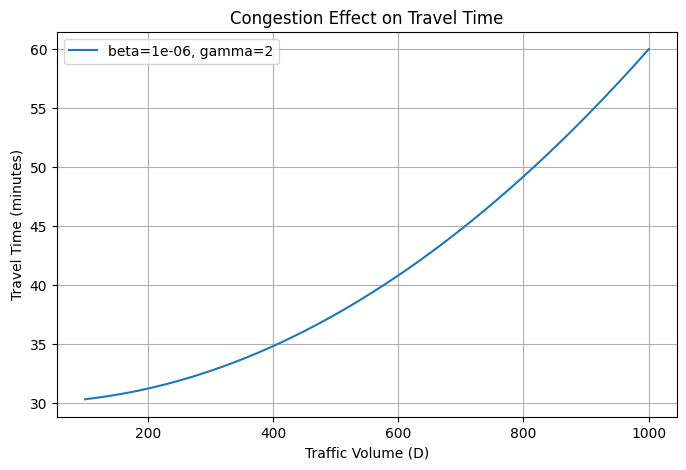

In [ ]:
# plot the travel time for different traffic volumes with selected congestion factors
plt.figure(figsize=(8, 5))
T_vals = congestion_function(D_values, selected_beta, selected_gamma)
plt.plot(D_values, T_vals, label=f'beta={selected_beta}, gamma={selected_gamma}')
plt.xlabel("Traffic Volume (D)")
plt.ylabel("Travel Time (minutes)")
plt.title("Congestion Effect on Travel Time")
plt.legend()
plt.grid()
plt.show()

## Generalized cost (no tax as default)

### Definition

In [687]:
# Parameters
time_value = 100  # SEK/hour

# Generalized cost function
def generalized_cost(D, beta=selected_beta, gamma=selected_gamma, tax=0):
    return time_value / 60 * congestion_function(D, beta, gamma) + tax

### Plot (different demands, selected congestion param)

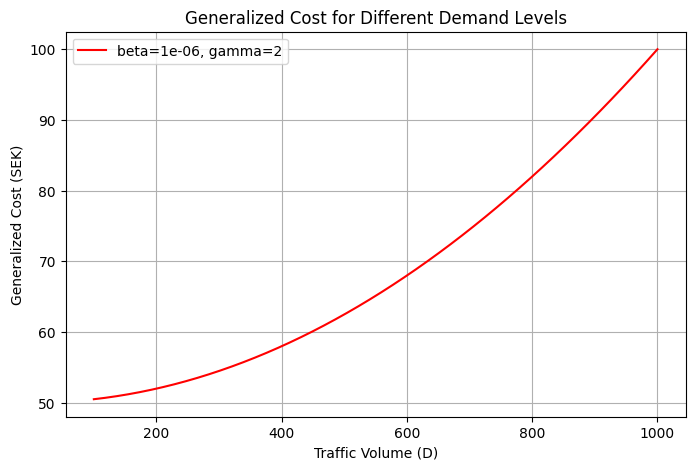

In [ ]:
# Plot generalized cost for different demands using selected beta and gamma
GC_vals = [generalized_cost(D) for D in D_values]
plt.figure(figsize=(8, 5))
plt.plot(D_values, GC_vals, linestyle='-', color='r', label=f'beta={selected_beta}, gamma={selected_gamma}')
plt.xlabel("Traffic Volume (D)")
plt.ylabel("Generalized Cost (SEK)")
plt.title("Generalized Cost for Different Demand Levels")
plt.legend()
plt.grid()
plt.show()

## Consumer surplus

### Definition

In [689]:
from scipy.integrate import quad

# Consumer surplus function (by default, tax is 0)
def consumer_surplus(D0, beta=selected_beta, gamma=selected_gamma, tax=0):
    integral_value, _ = quad(lambda x: inverse_demand_function(x), 0, D0)
    GK0 = generalized_cost(D0, beta, gamma, tax)
    return integral_value - GK0 * D0

### Plot (diff. demand, selected congestion param.)

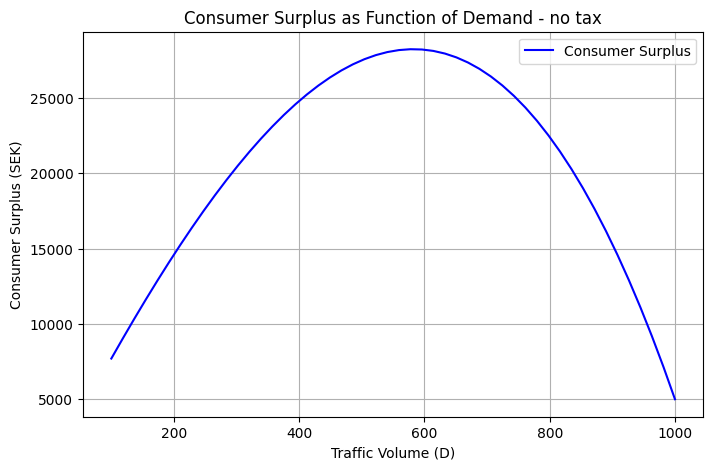

In [ ]:
# Compute and plot consumer surplus without tax
CS_vals = [consumer_surplus(D0) for D0 in D_values]
plt.figure(figsize=(8, 5))
plt.plot(D_values, CS_vals, label='Consumer Surplus', color='b')
plt.xlabel("Traffic Volume (D)")
plt.ylabel("Consumer Surplus (SEK)")
plt.title("Consumer Surplus as Function of Demand - no tax")
plt.legend()
plt.grid()
plt.show()

## Net benefits

### Definition (no tax, external effects - default)

In [691]:
external_cost_factor = 1.5  # External cost per vehicle

# Net Benefit function
def net_benefit(D, beta=selected_beta, gamma=selected_gamma, tax=0):
    CS = consumer_surplus(D, beta, gamma, tax)
    tax_revenue = D * tax
    external_costs = external_cost_factor * D
    return CS + tax_revenue - external_costs

### Plot (GK vs. IDF)

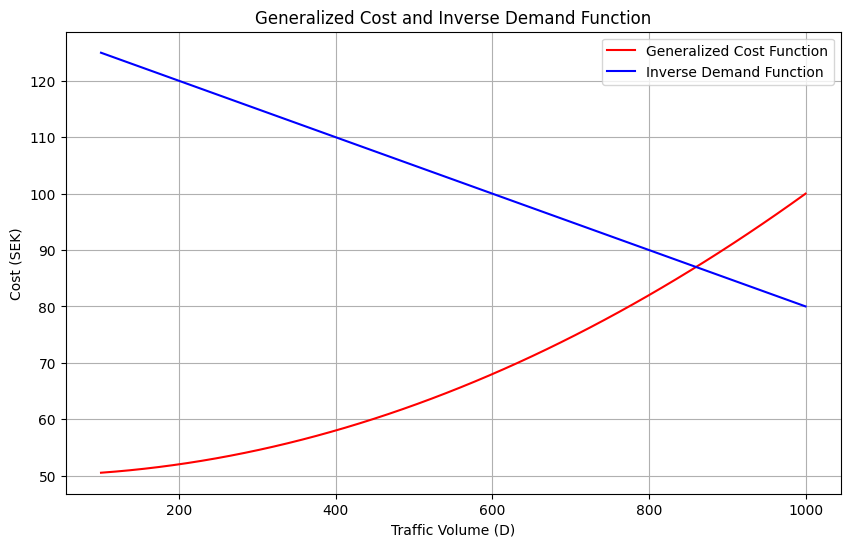

In [ ]:
# plot in one figure, for different values of traffic volume, the generalized cost and inverse demand function
plt.figure(figsize=(10, 6))

# Plot generalized cost
plt.plot(D_values, GC_vals, label='Generalized Cost Function', color='r')

# Plot inverse demand function
plt.plot(D_values, GK_vals, label='Inverse Demand Function', color='b')

# Labels and title
plt.xlabel("Traffic Volume (D)")
plt.ylabel("Cost (SEK)")
plt.title("Generalized Cost and Inverse Demand Function")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# calculate the equilibrium demand where the generalized cost function meets the inverse demand function
def equilibrium_demand(tax=0):
    def diff(D, tax=tax):
        return generalized_cost(D, tax=tax) - inverse_demand_function(D)
    res = minimize_scalar(lambda D: diff(D) ** 2)
    net_benefit_val = net_benefit(res.x, tax=tax)
    return res.x, net_benefit_val

# print the equilibrium demand
equilibrium_D = equilibrium_demand()[0]
print(f'Equilibrium demand: {equilibrium_D:.2f} cars')
# print the corresponding net benefit
net_benefit_val = equilibrium_demand()[1]
print(f'Net benefit at equilibrium: {net_benefit_val:.2f} SEK')

Equilibrium demand: 860.15 cars
Net benefit at equilibrium: 17206.10 SEK


### Optimal demand (no tax)

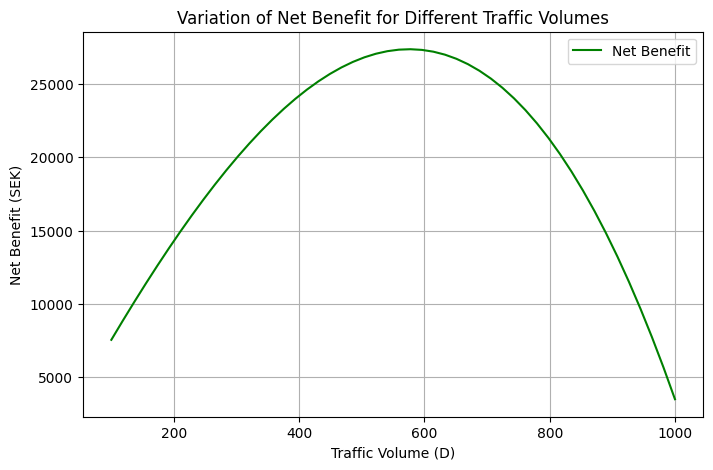

In [ ]:
# Compute net benefit for different values of traffic volume
net_benefit_vals = [net_benefit(D) for D in D_values]

# Plot the variation of net benefit
plt.figure(figsize=(8, 5))
plt.plot(D_values, net_benefit_vals, label='Net Benefit', color='g')
plt.xlabel("Traffic Volume (D)")
plt.ylabel("Net Benefit (SEK)")
plt.title("Variation of Net Benefit for Different Traffic Volumes")
plt.legend()
plt.grid()
plt.show()

In [695]:
# function to calculate the optimal traffic volume and net benefit
def optimal_traffic_volume(tax=0):
    def diff(D):
        return -net_benefit(D, tax=tax)
    demand_val = minimize_scalar(diff)
    net_benefit_val = -demand_val.fun
    return demand_val.x, net_benefit_val
# find and print the optimal traffic volume
optimal_D = optimal_traffic_volume()[0]
optimal_net_benefit = optimal_traffic_volume()[1]
print(f'Optimal traffic volume: {optimal_D:.2f} cars')
# the corresponding net benefit
print(f'Optimal net benefit: {optimal_net_benefit:.2f} SEK')
print('Note that the optimal traffic volume (without tax) is less than the equilibrium demand.')

Optimal traffic volume: 575.70 cars
Optimal net benefit: 27366.46 SEK
Note that the optimal traffic volume (without tax) is less than the equilibrium demand.


## Optimal congestion tax

### Generalized cost (diff tax levels)

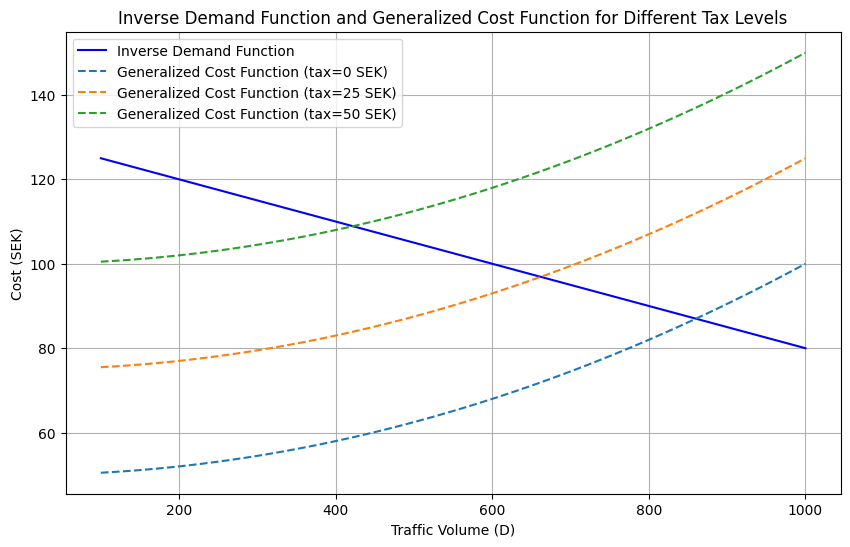

In [696]:
# Define tax levels to plot
tax_levels_to_plot = [0, 25, 50]

# Plot inverse demand function and generalized cost function for different tax levels
plt.figure(figsize=(10, 6))

# Plot inverse demand function
plt.plot(D_values, GK_vals, label='Inverse Demand Function', color='b')

# Plot generalized cost function for different tax levels
for tax in tax_levels_to_plot:
    GC_vals_with_tax = [generalized_cost(D, tax=tax) for D in D_values]
    plt.plot(D_values, GC_vals_with_tax, label=f'Generalized Cost Function (tax={tax} SEK)', linestyle='--')

# Labels and title
plt.xlabel("Traffic Volume (D)")
plt.ylabel("Cost (SEK)")
plt.title("Inverse Demand Function and Generalized Cost Function for Different Tax Levels")
plt.legend()
plt.grid()
plt.show()

### Consumer surplus (diff tax levels)

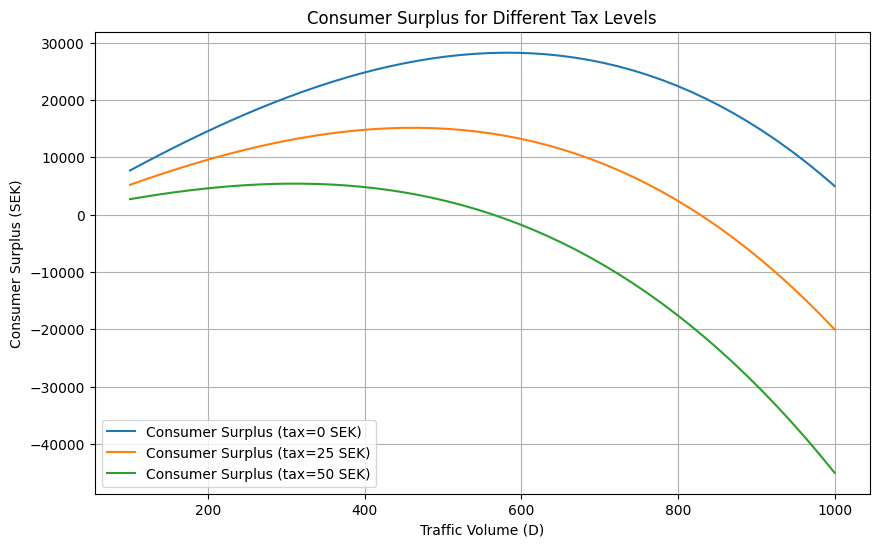

In [ ]:
# Define tax levels to plot
tax_levels_to_plot = [0, 25, 50]

# Plot consumer surplus for different tax levels
plt.figure(figsize=(10, 6))

for tax in tax_levels_to_plot:
    CS_vals_with_tax = [consumer_surplus(D0, tax=tax) for D0 in D_values]
    plt.plot(D_values, CS_vals_with_tax, label=f'Consumer Surplus (tax={tax} SEK)')

# Labels and title
plt.xlabel("Traffic Volume (D)")
plt.ylabel("Consumer Surplus (SEK)")
plt.title("Consumer Surplus for Different Tax Levels")
plt.legend()
plt.grid()
plt.show()

### Equilibrium demand for different tax levels

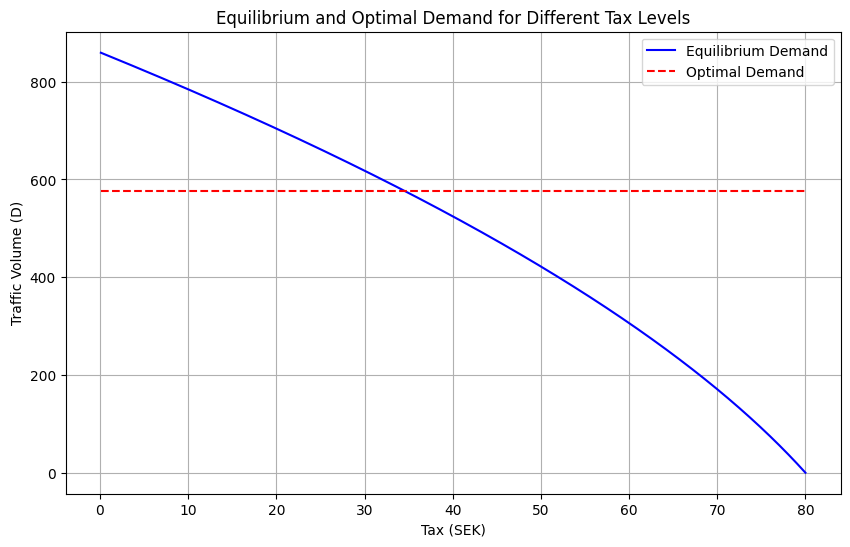

In [ ]:
tax_values = np.linspace(0.1, 80, 1000)  # Different tax values

# Calculate equilibrium demand for different tax values
equilibrium_demands = [equilibrium_demand(tax)[0] for tax in tax_values]

# Calculate optimal demand for different tax values
optimal_demands = [optimal_D] * len(tax_values)

# Plot the equilibrium and optimal demand for different tax values
plt.figure(figsize=(10, 6))
plt.plot(tax_values, equilibrium_demands, label='Equilibrium Demand', color='b')
plt.plot(tax_values, optimal_demands, label='Optimal Demand', color='r', linestyle='--')
plt.xlabel("Tax (SEK)")
plt.ylabel("Traffic Volume (D)")
plt.title("Equilibrium and Optimal Demand for Different Tax Levels")
plt.legend()
plt.grid()
plt.show()

In [705]:
# print the optimal tax value where the equilibrium demand is equal to the optimal demand
optimal_tax = tax_values[np.argmin(np.abs(np.array(equilibrium_demands) - optimal_D))]
print(f'Optimal tax value: {optimal_tax:.2f} SEK')

Optimal tax value: 34.65 SEK


In [706]:
# At equilibrium demand, calculate (using the expression for opt tax) the recommended tax
# expression for opt tax: tax (at D_eq) = time_value * derivative of congestion_function with respect to D * D_opt + derivative of the external cost factor with respect to D
def tax_at_optimal_demand():
    D_eq = optimal_D
    dT_dD = t0 * selected_beta * selected_gamma * D_eq ** (selected_gamma - 1)
    dEC_dD = external_cost_factor
    return time_value / 60 * dT_dD * D_eq + dEC_dD

recommended_tax = tax_at_optimal_demand()
print(f'Recommended tax value: {recommended_tax:.2f} SEK)')
print('Note that the recommended tax value is close to the optimal tax value.')

Recommended tax value: 34.64 SEK
